In [13]:
import pandas as pd
df = pd.read_csv('/Users/eileen/UR-Courses/Capstone/prediction.csv')
df.head()

,pid,t,month,true,mod1,mod2,mod3,mod4
0,100256,0,0,34,32.753078,32.605515,32.843560,32.795951
1,100256,10,0,30,32.753078,32.605515,32.843560,32.795951
2,100256,100,3,32,30.423151,29.887651,29.832056,29.843176
3,100256,189,6,25,27.189098,26.796877,26.450828,26.520038
4,100256,280,9,23,25.011992,24.188622,24.493704,24.432687


In [3]:
import package_gu.pm as pm
help(pm)

Help on module package_gu.pm in package_gu:

NAME
    package_gu.pm - Created on Sun Apr  7 15:42:50 2019

DESCRIPTION
    This is a package for evaluating different models and compare the performances for Python.
    
    PACKAGE CONTENTS:
        function1: descriptive statistics
        function2: histogram of a column
        function3: boxplot of predicted value for every model
        function4: plot predicted VS observed; plot residual VS observed
        function5: MPE for filtered feature
        function6 and 7: compare the perform of models with filtered feature
        function 8: get the confidence interval 
    @author: eileen

FUNCTIONS
    MPE_histogram(df, category, lower, upper, model)
        # function 5
    
    binned_prediction_summary(data)
        # function 1
    
    confidence_interval(df, category, lower, upper, model, confidence=0.95)
    
    draw_box(df, category, lower, upper)
        # function 3
    
    draw_scatter(df)
        # function 4
    
    

In [8]:
# function1: descriptive statistics
# input: the dataset
pm.binned_prediction_summary(df)

,t,month,true,mod1,mod2,mod3,mod4
count,29021.00,29021.00,29021.00,29021.00,29021.00,29021.00,29021.00
mean,207.45,6.49,32.56,32.50,32.51,32.52,32.52
std,197.06,6.52,9.02,7.59,7.65,7.56,7.57
min,-22.00,0.00,0.00,3.75,4.73,3.66,3.97
25%,64.00,2.00,27.00,27.40,27.41,27.39,27.39
50%,169.00,5.00,34.00,33.57,33.56,33.56,33.56
75%,301.00,10.00,39.00,38.33,38.32,38.43,38.41
max,2114.00,70.00,48.00,49.10,49.00,47.85,47.95


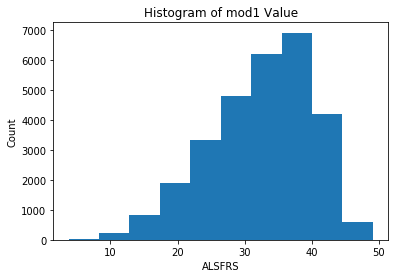

In [6]:
# function2: histogram of a column. 
# input: a column name of data
pm.histogram(df, 'mod1')

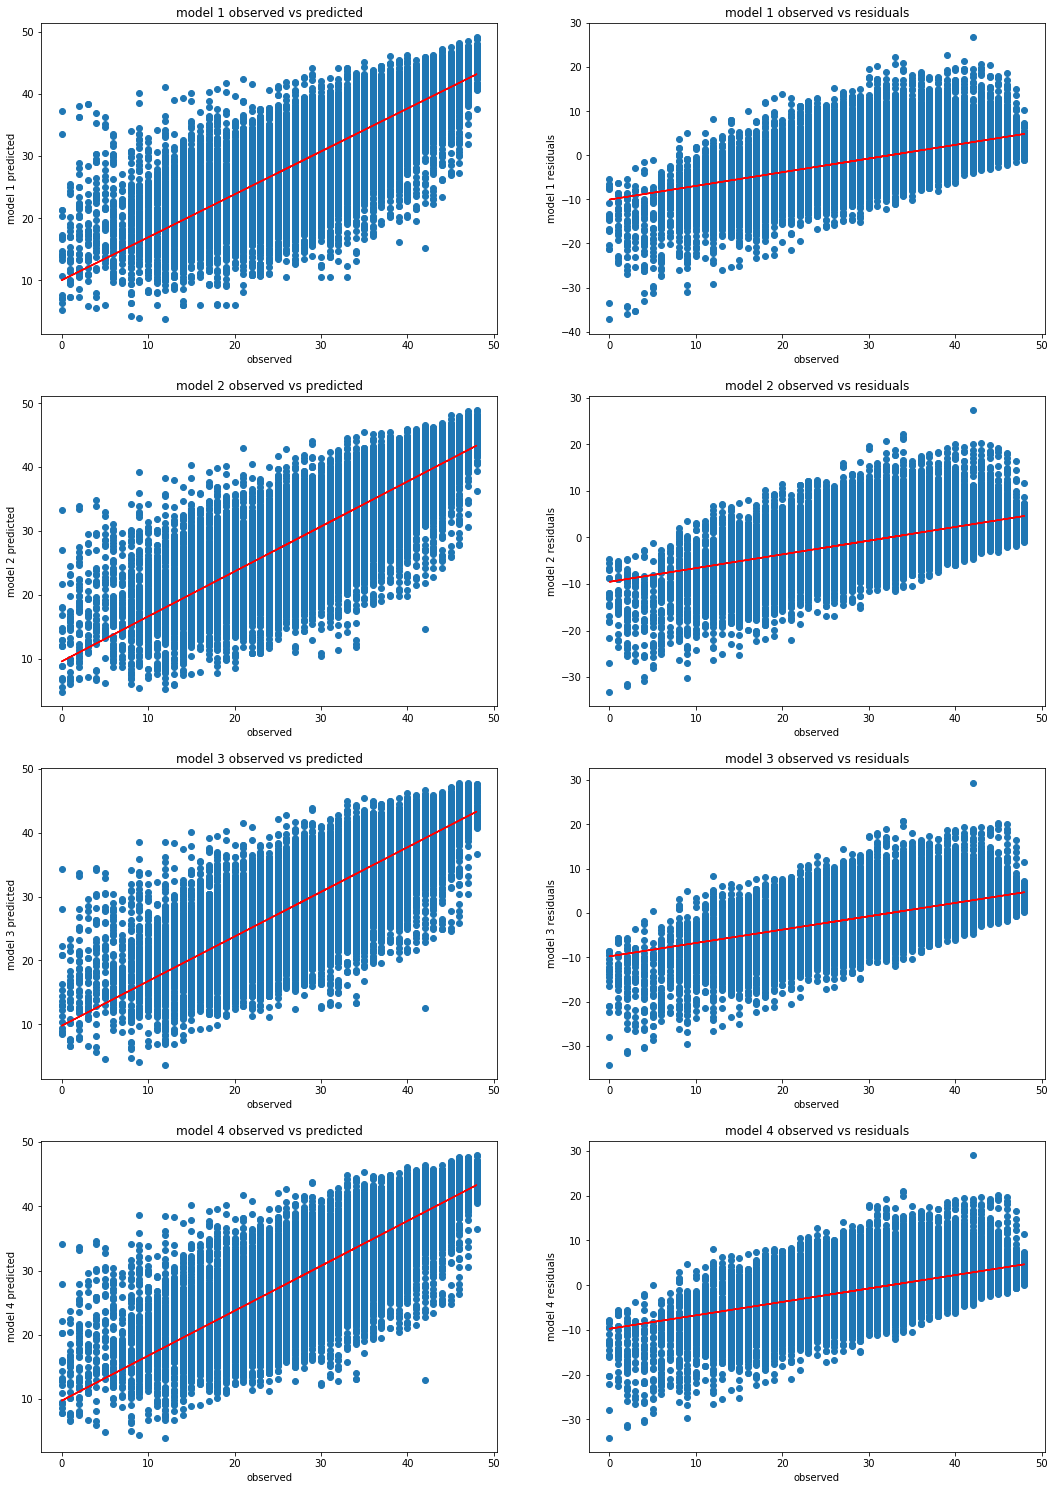

In [11]:
# function4 plot predicted VS observed; plot residual VS observed
# input: dataset
pm.draw_scatter(df)

In [8]:
# function6 and 7 compare the perform of models with filtered feature
# input: (dataset, filter_feature, lowerboundary, upperboundary)
q1 = pm.prediction_summary(df)
q1

,mod1,mod2,mod3,mod4
R^2,0.67,0.69,0.70,0.70
RMSE,5.17,5.00,4.98,4.97
Intercept,0.69,0.71,0.70,0.70
Slope,10.04,9.54,9.77,9.72
Skewness,-0.55,-0.53,-0.52,-0.52


In [ ]:
# mod1: limb/bulbar ensemble
# mod2: XGB
# mod3: LGB
# mod4: weighted ensemble

In [9]:
q2 = pm.prediction_summary(df, 't', 0, 366)
q2

,mod1,mod2,mod3,mod4
R^2,0.70,0.71,0.71,0.72
RMSE,4.42,4.32,4.31,4.30
Intercept,0.71,0.72,0.72,0.72
Slope,9.76,9.38,9.55,9.51
Skewness,-0.54,-0.53,-0.55,-0.54


In [10]:
q3 = pm.prediction_summary(df, 'month', 0,10)
q3

,mod1,mod2,mod3,mod4
R^2,0.71,0.72,0.72,0.73
RMSE,4.23,4.13,4.12,4.11
Intercept,0.72,0.73,0.73,0.73
Slope,9.53,9.15,9.34,9.31
Skewness,-0.55,-0.53,-0.56,-0.55


In [ ]:
# function3: boxplot of predicted value for every model
# input: (dataset, filtered feature, lower, upper)
pm.draw_box(df, 'month', 1, 10)

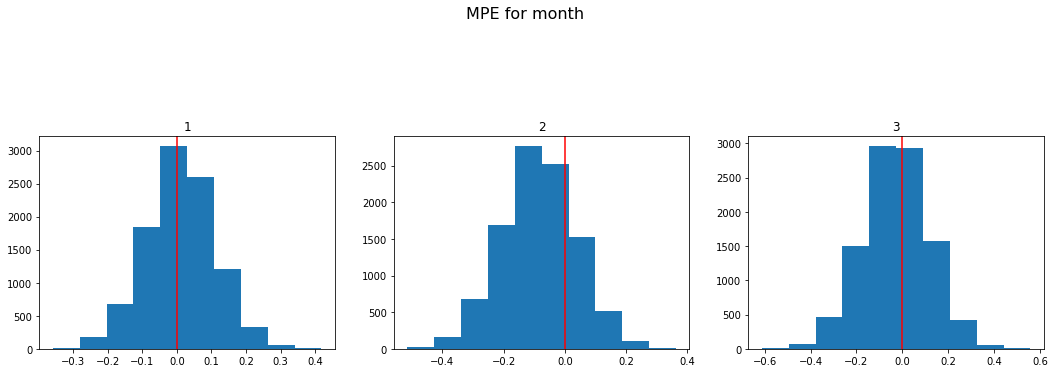

In [11]:
# function5 MPE for filtered feature.
# input: (dataset, filtered feature, lowerboundary, upperboundary, model_name in dataset)
pm.MPE_histogram(df, 'month', 1, 3, 'mod1')

In [17]:
# function 8 get the confidence interval 
# input: (dataset, feature, lowerboundary, upperboundary, model_name)
q8 = pm.confidence_interval(df,'month', 1, 12, 'mod1')
q8

,level,lower_bound,upper_bound
0,Month 1,0.000464,0.042209
1,Month 2,-0.104267,-0.056155
2,Month 3,-0.060647,-0.003703
3,Month 4,-0.025487,0.029376
4,Month 5,-0.105795,-0.023909
5,Month 6,-0.110025,-0.028342
6,Month 7,0.050476,0.140212
7,Month 8,-0.024918,0.087966
8,Month 9,-0.000146,0.093301
9,Month 10,-0.032266,0.100120
